In [1]:
import sys

sys.path.append("../")

In [2]:
import cheetah
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from gymnasium import spaces
from gymnasium.wrappers import RescaleAction
from stable_baselines3.common.env_checker import check_env

from compare.simon_maml.environment import e_trajectory_simENV
from src.environments.awake_e_steering import AwakeESteering
from src.wrappers import RescaleObservation

In [3]:
old_env = e_trajectory_simENV()

new_env = AwakeESteering(max_steerer_delta=3e-4)
wrapped_new_env = RescaleAction(new_env, -1, 1)
wrapped_new_env = RescaleObservation(
    wrapped_new_env, -1, 1, assumed_space=spaces.Box(-1e-2, 1e-2, shape=(10,))
)

In [4]:
old_env.train = True
task = old_env.sample_tasks(1)[0]
old_env.reset_task(task)

Number of tasks: 1


In [5]:
task

{'goal': [array([[  0.40955231,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  0.83640717,   0.47151044,   0.        ,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  2.77586545,   2.44141533,   1.40100721,   0.        ,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [  6.27809196,   5.59802063,   3.30769056,   0.41047894,
            0.        ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [ 12.97315806,  11.63034684,   6.94892334,   1.28609644,
            0.7506658 ,   0.        ,   0.        ,   0.        ,
            0.        ,   0.        ],
         [-19.05772556, -17.06941587, -10.17944498,  -1.77926997,
           -0.88556726,   0.54081689,   0.        ,   0.        ,
     

In [6]:
check_env(old_env)

In [7]:
check_env(wrapped_new_env)

In [8]:
old_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [9]:
new_env.action_space

Box(-0.0003, 0.0003, (10,), float32)

In [10]:
wrapped_new_env.action_space

Box(-1.0, 1.0, (10,), float32)

In [11]:
old_env.observation_space

Box(-1.0, 1.0, (10,), float32)

In [12]:
new_env.observation_space

Box(-inf, inf, (10,), float32)

In [13]:
wrapped_new_env.observation_space

Box(-inf, inf, (10,), float32)

In [14]:
old_env.reset()

(array([-0.00947574, -0.01011137, -0.03003481, -0.05800033, -0.08827658,
         0.12695417,  0.28211015,  0.2300874 ,  0.21268034,  0.28096968],
       dtype=float32),
 {'task': 0})

In [15]:
new_env.reset()

(array([-9.5925556e-05, -2.7808466e-04, -8.3317410e-04, -1.8014889e-03,
        -4.5149382e-03,  5.3895898e-03,  1.1846462e-02,  9.2244148e-03,
         6.0051037e-03,  4.0723197e-03], dtype=float32),
 {'backend_info': {'incoming_beam': array([1.0000000e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 9.8234415e-04, 1.9646883e-04, 9.8234415e-04,
          1.9646883e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [16]:
wrapped_new_env.reset()

(array([-0.00141829, -0.0034374 , -0.02921957, -0.08135736, -0.20291585,
         0.22149396,  0.49434245,  0.4006735 ,  0.2985252 ,  0.2522261 ],
       dtype=float32),
 {'backend_info': {'incoming_beam': array([1.0000000e+08, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
          0.0000000e+00, 9.8234415e-04, 1.9646883e-04, 9.8234415e-04,
          1.9646883e-04, 1.0000000e-06, 1.0000000e-06], dtype=float32),
   'quadrupole_settings': array([ -5.085799,   9.504011,  -8.240125, -31.725054,  19.703522,
          -31.725054,  -7.92377 ,  26.87176 ,  -1.07907 ,  16.7789  ,
          -14.029   ], dtype=float32)}})

In [17]:
%%timeit
_, _ = old_env.reset()

4.58 µs ± 55.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
%%timeit
_, _ = wrapped_new_env.reset()

5.81 ms ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
_, _, _, _, _ = old_env.step(old_env.action_space.sample())

23.2 µs ± 95.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [20]:
%%timeit
_, _, _, _, _ = wrapped_new_env.step(wrapped_new_env.action_space.sample())

5.89 ms ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


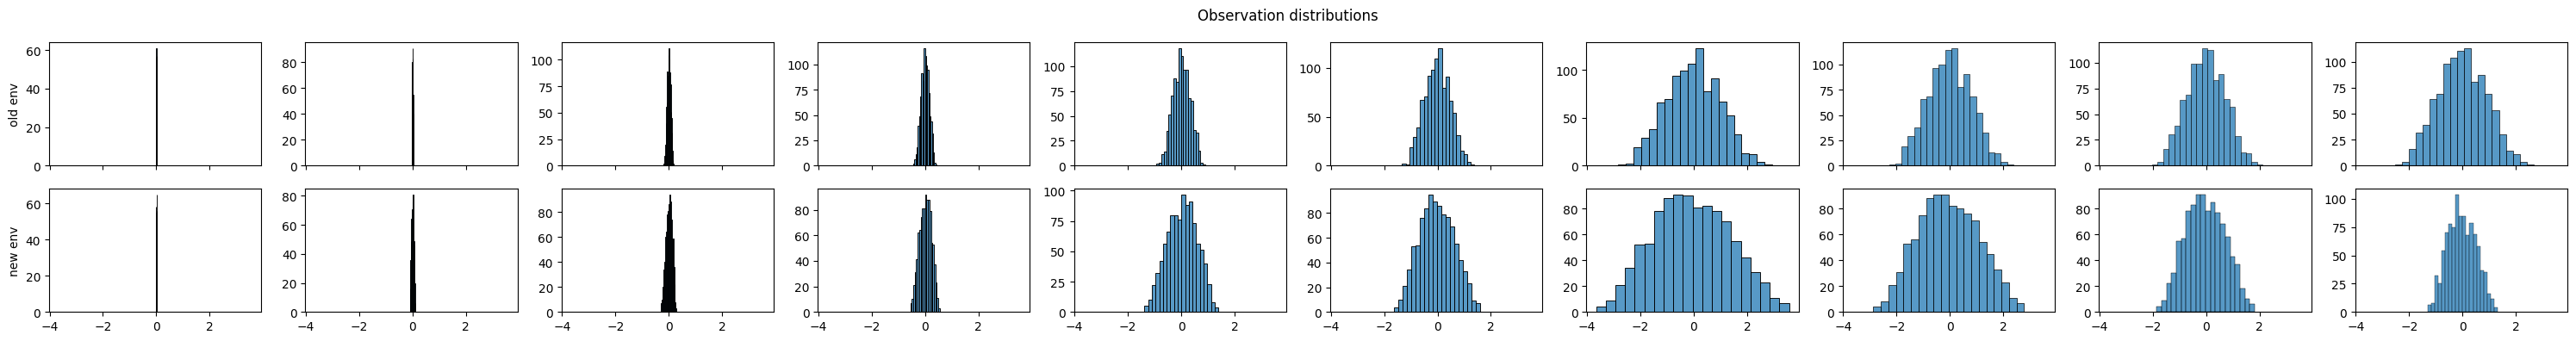

In [21]:
old_env_observations = []
new_env_observations = []
for _ in range(1_000):
    old_env_observations.append(old_env.reset()[0])
    new_env_observations.append(wrapped_new_env.reset()[0])

old_env_observations = np.array(old_env_observations)
new_env_observations = np.array(new_env_observations)

fig, axs = plt.subplots(2, 10, figsize=(30, 4), sharex=True)
for i in range(10):
    sns.histplot(old_env_observations[:, i], ax=axs[0, i], bins=20)
    sns.histplot(new_env_observations[:, i], ax=axs[1, i], bins=20)
    axs[0, i].set_ylabel(None)
    axs[1, i].set_ylabel(None)
axs[0, 0].set_ylabel("old env")
axs[1, 0].set_ylabel("new env")
fig.suptitle("Observation distributions")
plt.tight_layout()
plt.show()

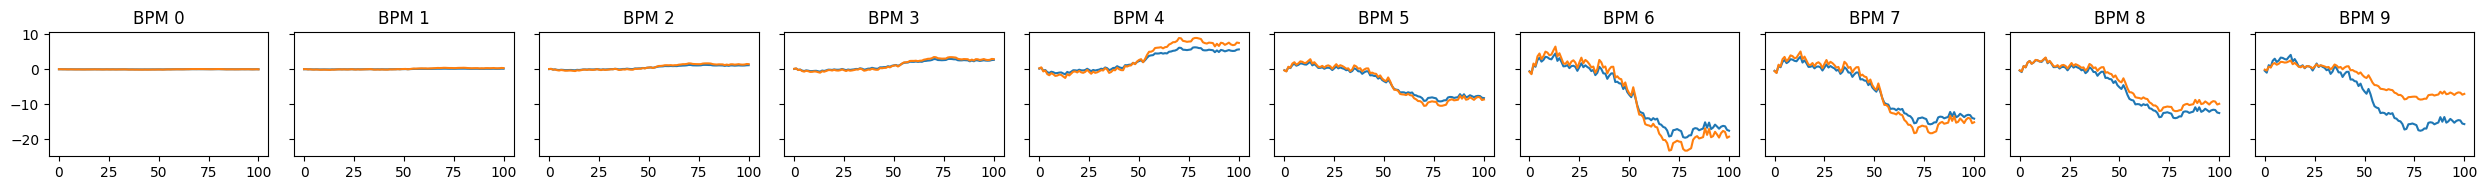

In [22]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = old_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
axs[0].legend()
plt.tight_layout()
plt.show()

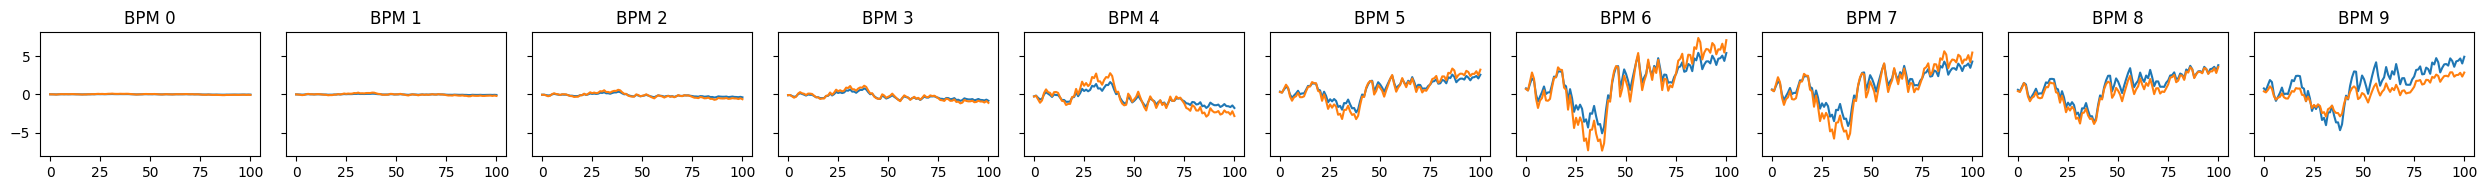

In [23]:
old_observations = []
new_observations = []

observation, info = old_env.reset()
old_observations.append(observation)

observation, info = wrapped_new_env.reset(options={"magnet_init": old_env.kicks_0})
new_observations.append(observation)

for _ in range(100):
    action = wrapped_new_env.action_space.sample()

    observation, reward, terminated, truncated, info = old_env.step(action)
    old_observations.append(observation)

    observation, reward, terminated, truncated, info = wrapped_new_env.step(action)
    new_observations.append(observation)

old_observations = np.array(old_observations)
new_observations = np.array(new_observations)

fig, axs = plt.subplots(1, 10, figsize=(25, 2), sharex=True, sharey=True)
for i in range(10):
    axs[i].plot(old_observations[:, i], label="old env")
    axs[i].plot(new_observations[:, i], label="new env")
    axs[i].set_title(f"BPM {i}")
axs[0].legend()
plt.tight_layout()
plt.show()